In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

39


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.49770 stdev: 0.07026
Best fitness: 0.72480 - size: (2, 13) - species 4 - id 113
Average adjusted fitness: 0.235
Mean genetic distance 2.891, standard deviation 0.443
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 29.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53399 stdev: 0.07305
Best fitness: 0.74335 - size: (3, 14) - species 5 - id 379
Average adjusted fitness: 0.253
Mean genetic distance 3.024, standard deviation 0.452
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 13.451 sec (21.591 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54428 stdev: 0.07445
Best fitness: 0.74335 - size: (3, 14) - species 33 - id 379
Average adjusted fitness: 0.250
Mean genetic distance 3.114, standard deviation 0.459
Population of 200 members in 42 speci

Population's average fitness: 0.63806 stdev: 0.10700
Best fitness: 0.80705 - size: (6, 20) - species 51 - id 2914
Average adjusted fitness: 0.309
Mean genetic distance 3.337, standard deviation 0.451
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 11.074 sec (10.621 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64181 stdev: 0.10113
Best fitness: 0.80705 - size: (6, 20) - species 51 - id 2914
Average adjusted fitness: 0.317
Mean genetic distance 3.342, standard deviation 0.449
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 10.858 sec (10.673 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64102 stdev: 0.10175
Best fitness: 0.80705 - size: (6, 20) - species 51 - id 2914
Average adjusted fitness: 0.226
Mean genetic distance 3.327, standard deviation 0.443
Population of 190 members in 40 species
Total extinctions: 0
Generation time: 12.125 sec (10.846 average)

 

Population's average fitness: 0.72810 stdev: 0.16661
Best fitness: 0.86209 - size: (3, 14) - species 39 - id 1197
Average adjusted fitness: 0.532
Mean genetic distance 3.123, standard deviation 0.481
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.405 sec (9.578 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72349 stdev: 0.17074
Best fitness: 0.86209 - size: (3, 14) - species 39 - id 1197
Average adjusted fitness: 0.531
Mean genetic distance 3.143, standard deviation 0.482
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.500 sec (9.474 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73610 stdev: 0.16039
Best fitness: 0.86333 - size: (4, 15) - species 39 - id 2911
Average adjusted fitness: 0.550
Mean genetic distance 3.182, standard deviation 0.490
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.782 sec (9.318 average)

 ******

Population's average fitness: 0.58552 stdev: 0.08237
Best fitness: 0.75943 - size: (6, 21) - species 1 - id 1856
Average adjusted fitness: 0.196
Mean genetic distance 3.297, standard deviation 0.501
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.140 sec (7.706 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58711 stdev: 0.08553
Best fitness: 0.75943 - size: (6, 21) - species 1 - id 1856
Average adjusted fitness: 0.262
Mean genetic distance 3.270, standard deviation 0.496
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.076 sec (7.830 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59514 stdev: 0.08366
Best fitness: 0.75943 - size: (6, 21) - species 1 - id 1856
Average adjusted fitness: 0.244
Mean genetic distance 3.290, standard deviation 0.489
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.341 sec (7.858 average)

 ****** Ru

Population's average fitness: 0.59530 stdev: 0.07945
Best fitness: 0.76562 - size: (4, 17) - species 24 - id 1098
Average adjusted fitness: 0.227
Mean genetic distance 3.146, standard deviation 0.508
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.721 sec (7.000 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60187 stdev: 0.07967
Best fitness: 0.76562 - size: (4, 17) - species 24 - id 1098
Average adjusted fitness: 0.272
Mean genetic distance 3.158, standard deviation 0.511
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 8.571 sec (7.196 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58948 stdev: 0.08368
Best fitness: 0.76562 - size: (4, 17) - species 24 - id 1098
Average adjusted fitness: 0.252
Mean genetic distance 3.181, standard deviation 0.511
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.663 sec (7.248 average)

 ****** R

Population's average fitness: 0.49034 stdev: 0.09064
Best fitness: 0.69326 - size: (2, 13) - species 2 - id 143
Average adjusted fitness: 0.153
Mean genetic distance 2.869, standard deviation 0.457
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52832 stdev: 0.09759
Best fitness: 0.73098 - size: (3, 15) - species 2 - id 271
Average adjusted fitness: 0.208
Mean genetic distance 2.976, standard deviation 0.486
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 6.421 sec (6.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53870 stdev: 0.09845
Best fitness: 0.73098 - size: (3, 15) - species 12 - id 271
Average adjusted fitness: 0.246
Mean genetic distance 2.999, standard deviation 0.481
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 6.612 sec (6.297 average)

 ****** Running generation 3 *

Population's average fitness: 0.61078 stdev: 0.10538
Best fitness: 0.78602 - size: (3, 17) - species 12 - id 1807
Average adjusted fitness: 0.254
Mean genetic distance 3.232, standard deviation 0.504
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.274 sec (8.848 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61051 stdev: 0.11013
Best fitness: 0.78602 - size: (3, 17) - species 12 - id 1807
Average adjusted fitness: 0.238
Mean genetic distance 3.223, standard deviation 0.516
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.566 sec (8.363 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62442 stdev: 0.09859
Best fitness: 0.78602 - size: (3, 17) - species 12 - id 1807
Average adjusted fitness: 0.285
Mean genetic distance 3.215, standard deviation 0.512
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.605 sec (8.169 average)

 ******

Population's average fitness: 0.71758 stdev: 0.18684
Best fitness: 0.87755 - size: (7, 22) - species 23 - id 1758
Average adjusted fitness: 0.517
Mean genetic distance 3.259, standard deviation 0.511
Population of 186 members in 40 species
Total extinctions: 0
Generation time: 7.482 sec (7.767 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74849 stdev: 0.14602
Best fitness: 0.87755 - size: (7, 22) - species 23 - id 1758
Average adjusted fitness: 0.549
Mean genetic distance 3.294, standard deviation 0.488
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.227 sec (7.749 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74950 stdev: 0.13881
Best fitness: 0.87755 - size: (7, 22) - species 23 - id 1758
Average adjusted fitness: 0.554
Mean genetic distance 3.298, standard deviation 0.486
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.743 sec (7.777 average)

 ******

Population's average fitness: 0.60598 stdev: 0.09897
Best fitness: 0.77737 - size: (5, 17) - species 37 - id 1161
Average adjusted fitness: 0.314
Mean genetic distance 3.059, standard deviation 0.468
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.525 sec (7.091 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60886 stdev: 0.10257
Best fitness: 0.77737 - size: (5, 17) - species 37 - id 1161
Average adjusted fitness: 0.306
Mean genetic distance 3.078, standard deviation 0.474
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.592 sec (7.192 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62157 stdev: 0.09818
Best fitness: 0.77737 - size: (5, 17) - species 37 - id 1161
Average adjusted fitness: 0.268
Mean genetic distance 3.109, standard deviation 0.468
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.886 sec (7.304 average)

 ******

Mean genetic distance 3.112, standard deviation 0.498
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.383 sec (8.231 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59979 stdev: 0.14935
Best fitness: 0.75139 - size: (4, 15) - species 8 - id 1114
Average adjusted fitness: 0.301
Mean genetic distance 3.117, standard deviation 0.497
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.345 sec (8.121 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61980 stdev: 0.13953
Best fitness: 0.75572 - size: (5, 16) - species 8 - id 1411
Average adjusted fitness: 0.321
Mean genetic distance 3.146, standard deviation 0.500
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.376 sec (8.038 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63772 stdev: 0.12345
Best fitness: 0.75572 - size: (5, 16) - species 8 - id 1411
Averag

Population's average fitness: 0.53939 stdev: 0.08662
Best fitness: 0.76933 - size: (2, 14) - species 21 - id 327
Average adjusted fitness: 0.282
Mean genetic distance 2.972, standard deviation 0.476
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.415 sec (6.168 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55899 stdev: 0.08788
Best fitness: 0.77551 - size: (2, 14) - species 2 - id 528
Average adjusted fitness: 0.248
Mean genetic distance 3.007, standard deviation 0.489
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 6.614 sec (6.317 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57276 stdev: 0.09287
Best fitness: 0.77551 - size: (2, 14) - species 2 - id 528
Average adjusted fitness: 0.231
Mean genetic distance 2.959, standard deviation 0.495
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.978 sec (6.482 average)

 ****** Runnin

Population's average fitness: 0.64375 stdev: 0.11255
Best fitness: 0.82498 - size: (4, 20) - species 7 - id 2568
Average adjusted fitness: 0.319
Mean genetic distance 3.281, standard deviation 0.517
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.184 sec (7.710 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64200 stdev: 0.11611
Best fitness: 0.85591 - size: (7, 22) - species 18 - id 3837
Average adjusted fitness: 0.354
Mean genetic distance 3.250, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.107 sec (7.761 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64008 stdev: 0.11259
Best fitness: 0.85591 - size: (7, 22) - species 18 - id 3837
Average adjusted fitness: 0.293
Mean genetic distance 3.285, standard deviation 0.523
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.207 sec (7.837 average)

 ****** 

Population's average fitness: 0.65211 stdev: 0.12714
Best fitness: 0.77304 - size: (6, 20) - species 26 - id 760
Average adjusted fitness: 0.363
Mean genetic distance 3.227, standard deviation 0.488
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.883 sec (8.384 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63215 stdev: 0.13970
Best fitness: 0.77304 - size: (6, 20) - species 26 - id 760
Average adjusted fitness: 0.336
Mean genetic distance 3.235, standard deviation 0.491
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 12.988 sec (8.906 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64754 stdev: 0.13672
Best fitness: 0.77304 - size: (6, 20) - species 26 - id 760
Average adjusted fitness: 0.347
Mean genetic distance 3.236, standard deviation 0.492
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.946 sec (8.934 average)

 ****** 

Population's average fitness: 0.62186 stdev: 0.12779
Best fitness: 0.82808 - size: (7, 22) - species 29 - id 1963
Average adjusted fitness: 0.290
Mean genetic distance 3.200, standard deviation 0.516
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.327 sec (7.173 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63955 stdev: 0.11661
Best fitness: 0.82808 - size: (7, 22) - species 29 - id 1963
Average adjusted fitness: 0.344
Mean genetic distance 3.163, standard deviation 0.502
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.828 sec (7.259 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63754 stdev: 0.11095
Best fitness: 0.82808 - size: (7, 22) - species 29 - id 1963
Average adjusted fitness: 0.243
Mean genetic distance 3.163, standard deviation 0.503
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.831 sec (7.352 average)

 ******

Mean genetic distance 3.211, standard deviation 0.522
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.299 sec (6.860 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.79146 stdev: 0.22340
Best fitness: 0.91528 - size: (3, 16) - species 6 - id 1093
Average adjusted fitness: 0.674
Mean genetic distance 3.191, standard deviation 0.519
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.401 sec (6.920 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.76274 stdev: 0.25005
Best fitness: 0.91528 - size: (3, 16) - species 6 - id 1093
Average adjusted fitness: 0.645
Mean genetic distance 3.183, standard deviation 0.515
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.409 sec (6.969 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.80610 stdev: 0.21168
Best fitness: 0.91528 - size: (3, 16) - species 6 - id 1093
Avera

Mean genetic distance 3.093, standard deviation 0.464
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.694 sec (6.381 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57414 stdev: 0.09678
Best fitness: 0.75881 - size: (3, 13) - species 25 - id 491
Average adjusted fitness: 0.296
Mean genetic distance 3.146, standard deviation 0.474
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 6.676 sec (6.480 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57122 stdev: 0.09697
Best fitness: 0.75881 - size: (3, 13) - species 25 - id 491
Average adjusted fitness: 0.265
Mean genetic distance 3.182, standard deviation 0.480
Population of 197 members in 48 species
Total extinctions: 0
Generation time: 7.045 sec (6.621 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58756 stdev: 0.09153
Best fitness: 0.75881 - size: (3, 13) - species 25 - id 491
Averag

Mean genetic distance 3.326, standard deviation 0.505
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 7.910 sec (7.810 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64202 stdev: 0.11348
Best fitness: 0.80025 - size: (4, 17) - species 3 - id 2540
Average adjusted fitness: 0.261
Mean genetic distance 3.330, standard deviation 0.494
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.116 sec (7.872 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64278 stdev: 0.11486
Best fitness: 0.80025 - size: (4, 17) - species 3 - id 2540
Average adjusted fitness: 0.274
Mean genetic distance 3.336, standard deviation 0.497
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.177 sec (7.946 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63337 stdev: 0.12108
Best fitness: 0.80025 - size: (4, 17) - species 3 - id 2540
Ave

Mean genetic distance 3.268, standard deviation 0.517
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.405 sec (8.854 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59425 stdev: 0.08592
Best fitness: 0.79716 - size: (5, 20) - species 30 - id 1844
Average adjusted fitness: 0.235
Mean genetic distance 3.279, standard deviation 0.523
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.246 sec (8.925 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59965 stdev: 0.07968
Best fitness: 0.79716 - size: (5, 20) - species 30 - id 1844
Average adjusted fitness: 0.155
Mean genetic distance 3.289, standard deviation 0.511
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 8.339 sec (8.943 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59262 stdev: 0.08567
Best fitness: 0.79716 - size: (5, 20) - species 30 - id 1844


Mean genetic distance 3.160, standard deviation 0.505
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.449 sec (7.365 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58738 stdev: 0.07796
Best fitness: 0.75634 - size: (6, 20) - species 32 - id 1716
Average adjusted fitness: 0.249
Mean genetic distance 3.168, standard deviation 0.499
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.936 sec (7.442 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58622 stdev: 0.07839
Best fitness: 0.75634 - size: (6, 20) - species 32 - id 1716
Average adjusted fitness: 0.171
Mean genetic distance 3.174, standard deviation 0.502
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 7.740 sec (7.495 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59697 stdev: 0.07740
Best fitness: 0.75634 - size: (6, 20) - species 32 - id 1716


Mean genetic distance 3.103, standard deviation 0.510
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.407 sec (6.830 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59453 stdev: 0.11405
Best fitness: 0.80210 - size: (4, 17) - species 26 - id 828
Average adjusted fitness: 0.291
Mean genetic distance 3.103, standard deviation 0.499
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.305 sec (6.883 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60984 stdev: 0.10861
Best fitness: 0.80210 - size: (4, 17) - species 26 - id 828
Average adjusted fitness: 0.254
Mean genetic distance 3.132, standard deviation 0.501
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.679 sec (6.962 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61067 stdev: 0.10798
Best fitness: 0.80210 - size: (4, 17) - species 26 - id 828
Avera

Total extinctions: 0
Generation time: 6.439 sec (6.195 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57082 stdev: 0.09592
Best fitness: 0.81262 - size: (3, 13) - species 7 - id 508
Average adjusted fitness: 0.246
Mean genetic distance 2.966, standard deviation 0.464
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.839 sec (6.410 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57979 stdev: 0.10461
Best fitness: 0.81942 - size: (4, 17) - species 25 - id 646
Average adjusted fitness: 0.322
Mean genetic distance 3.021, standard deviation 0.473
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.682 sec (6.978 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60358 stdev: 0.10969
Best fitness: 0.82870 - size: (3, 16) - species 25 - id 830
Average adjusted fitness: 0.258
Mean genetic distance 3.095, standard deviation 0.486
Population of 1

Population's average fitness: 0.63738 stdev: 0.14056
Best fitness: 0.85467 - size: (4, 19) - species 25 - id 2400
Average adjusted fitness: 0.420
Mean genetic distance 3.291, standard deviation 0.511
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.877 sec (7.763 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63934 stdev: 0.13633
Best fitness: 0.85467 - size: (4, 19) - species 25 - id 2400
Average adjusted fitness: 0.330
Mean genetic distance 3.288, standard deviation 0.526
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 8.336 sec (7.835 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65387 stdev: 0.12985
Best fitness: 0.85467 - size: (4, 19) - species 25 - id 2400
Average adjusted fitness: 0.327
Mean genetic distance 3.272, standard deviation 0.524
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.989 sec (7.869 average)

 ******

Mean genetic distance 3.171, standard deviation 0.505
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.804 sec (7.830 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59378 stdev: 0.08329
Best fitness: 0.74954 - size: (6, 16) - species 14 - id 3015
Average adjusted fitness: 0.227
Mean genetic distance 3.180, standard deviation 0.515
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 8.010 sec (7.887 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.58877 stdev: 0.08318
Best fitness: 0.74954 - size: (6, 16) - species 14 - id 3015
Average adjusted fitness: 0.177
Mean genetic distance 3.207, standard deviation 0.517
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.245 sec (7.771 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59109 stdev: 0.08286
Best fitness: 0.74954 - size: (6, 16) - species 14 - id 3015


Mean genetic distance 3.127, standard deviation 0.469
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 7.787 sec (7.604 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63960 stdev: 0.11941
Best fitness: 0.82808 - size: (6, 18) - species 25 - id 1911
Average adjusted fitness: 0.281
Mean genetic distance 3.155, standard deviation 0.474
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 7.798 sec (7.654 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65462 stdev: 0.11712
Best fitness: 0.83179 - size: (7, 25) - species 35 - id 2086
Average adjusted fitness: 0.355
Mean genetic distance 3.150, standard deviation 0.472
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.721 sec (7.683 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64285 stdev: 0.12365
Best fitness: 0.83179 - size: (7, 25) - species 35 - id 2086


Mean genetic distance 3.164, standard deviation 0.464
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.613 sec (7.013 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62049 stdev: 0.11730
Best fitness: 0.80272 - size: (5, 18) - species 38 - id 1304
Average adjusted fitness: 0.301
Mean genetic distance 3.178, standard deviation 0.459
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.418 sec (7.054 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63636 stdev: 0.10531
Best fitness: 0.83612 - size: (5, 18) - species 38 - id 1584
Average adjusted fitness: 0.241
Mean genetic distance 3.168, standard deviation 0.456
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.442 sec (7.199 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64702 stdev: 0.10115
Best fitness: 0.83859 - size: (3, 16) - species 15 - id 1687
A

Mean genetic distance 3.104, standard deviation 0.483
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.745 sec (6.376 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55983 stdev: 0.07968
Best fitness: 0.67904 - size: (2, 14) - species 1 - id 481
Average adjusted fitness: 0.194
Mean genetic distance 3.141, standard deviation 0.478
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.950 sec (6.519 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55929 stdev: 0.07964
Best fitness: 0.67904 - size: (2, 14) - species 1 - id 481
Average adjusted fitness: 0.194
Mean genetic distance 3.143, standard deviation 0.470
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.283 sec (6.672 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56729 stdev: 0.08118
Best fitness: 0.67904 - size: (2, 14) - species 1 - id 481
Average a

Mean genetic distance 3.298, standard deviation 0.508
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.137 sec (8.014 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59241 stdev: 0.08217
Best fitness: 0.73408 - size: (9, 31) - species 8 - id 3674
Average adjusted fitness: 0.215
Mean genetic distance 3.306, standard deviation 0.492
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.272 sec (8.045 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.58289 stdev: 0.09269
Best fitness: 0.73408 - size: (9, 31) - species 8 - id 3674
Average adjusted fitness: 0.251
Mean genetic distance 3.303, standard deviation 0.518
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 8.215 sec (8.089 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58607 stdev: 0.08834
Best fitness: 0.73408 - size: (9, 31) - species 8 - id 3674
Ave

Mean genetic distance 3.302, standard deviation 0.513
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 8.230 sec (8.034 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68686 stdev: 0.10572
Best fitness: 0.80519 - size: (4, 16) - species 25 - id 800
Average adjusted fitness: 0.392
Mean genetic distance 3.295, standard deviation 0.503
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 7.822 sec (8.024 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66250 stdev: 0.12921
Best fitness: 0.80519 - size: (4, 16) - species 25 - id 800
Average adjusted fitness: 0.370
Mean genetic distance 3.284, standard deviation 0.527
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.826 sec (8.000 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66624 stdev: 0.13538
Best fitness: 0.80519 - size: (4, 16) - species 25 - id 800
Ave

Mean genetic distance 3.217, standard deviation 0.487
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.980 sec (7.850 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60126 stdev: 0.08757
Best fitness: 0.80829 - size: (4, 20) - species 9 - id 1676
Average adjusted fitness: 0.290
Mean genetic distance 3.218, standard deviation 0.485
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.025 sec (7.908 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59945 stdev: 0.08262
Best fitness: 0.80829 - size: (4, 20) - species 9 - id 1676
Average adjusted fitness: 0.208
Mean genetic distance 3.210, standard deviation 0.477
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 8.157 sec (7.964 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60851 stdev: 0.08291
Best fitness: 0.80829 - size: (4, 20) - species 9 - id 1676
Ave

Mean genetic distance 3.253, standard deviation 0.490
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.246 sec (7.011 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60852 stdev: 0.10381
Best fitness: 0.78479 - size: (4, 15) - species 24 - id 926
Average adjusted fitness: 0.309
Mean genetic distance 3.254, standard deviation 0.486
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 7.590 sec (7.069 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60787 stdev: 0.11638
Best fitness: 0.81942 - size: (5, 19) - species 19 - id 1490
Average adjusted fitness: 0.308
Mean genetic distance 3.252, standard deviation 0.487
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 7.671 sec (7.243 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61141 stdev: 0.11342
Best fitness: 0.81942 - size: (5, 19) - species 19 - id 1490
Av

Mean genetic distance 3.151, standard deviation 0.514
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.003 sec (6.450 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54699 stdev: 0.06398
Best fitness: 0.69573 - size: (2, 13) - species 6 - id 509
Average adjusted fitness: 0.161
Mean genetic distance 3.185, standard deviation 0.510
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.070 sec (6.605 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55475 stdev: 0.06837
Best fitness: 0.72356 - size: (3, 15) - species 6 - id 816
Average adjusted fitness: 0.219
Mean genetic distance 3.223, standard deviation 0.516
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.181 sec (6.720 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56431 stdev: 0.06889
Best fitness: 0.72356 - size: (3, 15) - species 6 - id 816
Average a

Mean genetic distance 3.363, standard deviation 0.485
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 8.718 sec (8.274 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61706 stdev: 0.07720
Best fitness: 0.73717 - size: (8, 27) - species 4 - id 3400
Average adjusted fitness: 0.166
Mean genetic distance 3.369, standard deviation 0.489
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.935 sec (8.359 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60908 stdev: 0.07791
Best fitness: 0.73717 - size: (8, 27) - species 4 - id 3400
Average adjusted fitness: 0.146
Mean genetic distance 3.354, standard deviation 0.492
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.172 sec (8.474 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60390 stdev: 0.08190
Best fitness: 0.73717 - size: (8, 27) - species 4 - id 3400
Ave

Mean genetic distance 3.379, standard deviation 0.492
Population of 188 members in 38 species
Total extinctions: 0
Generation time: 8.033 sec (7.889 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.70015 stdev: 0.16331
Best fitness: 0.89363 - size: (5, 18) - species 44 - id 1169
Average adjusted fitness: 0.458
Mean genetic distance 3.383, standard deviation 0.475
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.743 sec (7.871 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.69942 stdev: 0.15879
Best fitness: 0.89363 - size: (5, 18) - species 44 - id 1169
Average adjusted fitness: 0.484
Mean genetic distance 3.395, standard deviation 0.486
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.315 sec (7.915 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69028 stdev: 0.16904
Best fitness: 0.89363 - size: (5, 18) - species 44 - id 1169


Mean genetic distance 3.263, standard deviation 0.465
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 8.567 sec (8.950 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62569 stdev: 0.09292
Best fitness: 0.78417 - size: (6, 19) - species 16 - id 1680
Average adjusted fitness: 0.194
Mean genetic distance 3.275, standard deviation 0.467
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 8.713 sec (9.022 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61478 stdev: 0.09873
Best fitness: 0.78417 - size: (6, 19) - species 16 - id 1680
Average adjusted fitness: 0.249
Mean genetic distance 3.303, standard deviation 0.475
Population of 194 members in 46 species
Total extinctions: 0
Generation time: 8.256 sec (9.069 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61476 stdev: 0.09969
Best fitness: 0.78850 - size: (6, 20) - species 16 - id 2338


Mean genetic distance 3.191, standard deviation 0.482
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.475 sec (6.946 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56545 stdev: 0.06295
Best fitness: 0.71985 - size: (3, 15) - species 34 - id 1076
Average adjusted fitness: 0.172
Mean genetic distance 3.174, standard deviation 0.475
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.479 sec (7.000 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56319 stdev: 0.06233
Best fitness: 0.71985 - size: (3, 15) - species 34 - id 1076
Average adjusted fitness: 0.170
Mean genetic distance 3.177, standard deviation 0.475
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.436 sec (7.141 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.56996 stdev: 0.06339
Best fitness: 0.71985 - size: (3, 15) - species 34 - id 1076
A

Mean genetic distance 3.024, standard deviation 0.474
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.749 sec (6.441 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58568 stdev: 0.08648
Best fitness: 0.77304 - size: (4, 17) - species 30 - id 680
Average adjusted fitness: 0.237
Mean genetic distance 3.107, standard deviation 0.472
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.971 sec (6.573 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58279 stdev: 0.09357
Best fitness: 0.77304 - size: (4, 17) - species 30 - id 680
Average adjusted fitness: 0.219
Mean genetic distance 3.124, standard deviation 0.491
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.283 sec (6.715 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58539 stdev: 0.09849
Best fitness: 0.77304 - size: (4, 17) - species 30 - id 680
Averag

Mean genetic distance 3.204, standard deviation 0.497
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 13.782 sec (9.125 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61667 stdev: 0.12248
Best fitness: 0.79468 - size: (5, 17) - species 42 - id 2719
Average adjusted fitness: 0.269
Mean genetic distance 3.229, standard deviation 0.505
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 11.453 sec (9.469 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63625 stdev: 0.11037
Best fitness: 0.79468 - size: (5, 17) - species 42 - id 2719
Average adjusted fitness: 0.253
Mean genetic distance 3.253, standard deviation 0.514
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.679 sec (9.529 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62569 stdev: 0.11151
Best fitness: 0.79468 - size: (5, 17) - species 42 - id 271

Mean genetic distance 3.245, standard deviation 0.474
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.126 sec (7.974 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63760 stdev: 0.10269
Best fitness: 0.79221 - size: (7, 22) - species 39 - id 2703
Average adjusted fitness: 0.250
Mean genetic distance 3.265, standard deviation 0.498
Population of 187 members in 36 species
Total extinctions: 0
Generation time: 8.066 sec (8.003 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62981 stdev: 0.11726
Best fitness: 0.79221 - size: (7, 22) - species 39 - id 2703
Average adjusted fitness: 0.320
Mean genetic distance 3.262, standard deviation 0.484
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.057 sec (8.020 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63391 stdev: 0.10254
Best fitness: 0.79221 - size: (7, 22) - species 39 - id 2703


Mean genetic distance 3.280, standard deviation 0.493
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 7.631 sec (7.515 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58449 stdev: 0.06463
Best fitness: 0.71243 - size: (3, 16) - species 32 - id 1077
Average adjusted fitness: 0.133
Mean genetic distance 3.280, standard deviation 0.490
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 7.858 sec (7.606 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58637 stdev: 0.07103
Best fitness: 0.71243 - size: (3, 16) - species 32 - id 1077
Average adjusted fitness: 0.182
Mean genetic distance 3.260, standard deviation 0.484
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 7.832 sec (7.678 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58848 stdev: 0.06922
Best fitness: 0.71243 - size: (3, 16) - species 32 - id 1077


Mean genetic distance 3.168, standard deviation 0.502
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.600 sec (7.106 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58499 stdev: 0.07616
Best fitness: 0.74150 - size: (3, 16) - species 5 - id 550
Average adjusted fitness: 0.210
Mean genetic distance 3.159, standard deviation 0.499
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.914 sec (7.187 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59133 stdev: 0.07937
Best fitness: 0.74212 - size: (3, 17) - species 16 - id 1628
Average adjusted fitness: 0.211
Mean genetic distance 3.148, standard deviation 0.498
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.027 sec (7.492 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59197 stdev: 0.08551
Best fitness: 0.77798 - size: (4, 17) - species 5 - id 1750
Aver

Mean genetic distance 3.102, standard deviation 0.521
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.819 sec (6.413 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63233 stdev: 0.13551
Best fitness: 0.80210 - size: (5, 20) - species 34 - id 630
Average adjusted fitness: 0.316
Mean genetic distance 3.117, standard deviation 0.525
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.050 sec (6.572 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64171 stdev: 0.12729
Best fitness: 0.80334 - size: (3, 17) - species 38 - id 789
Average adjusted fitness: 0.337
Mean genetic distance 3.107, standard deviation 0.522
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.126 sec (6.683 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64079 stdev: 0.13550
Best fitness: 0.80334 - size: (3, 17) - species 38 - id 789
Averag

Mean genetic distance 3.264, standard deviation 0.515
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.951 sec (8.805 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66045 stdev: 0.14962
Best fitness: 0.82251 - size: (4, 19) - species 20 - id 2530
Average adjusted fitness: 0.427
Mean genetic distance 3.259, standard deviation 0.520
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.008 sec (8.884 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68345 stdev: 0.13402
Best fitness: 0.85652 - size: (5, 20) - species 20 - id 3812
Average adjusted fitness: 0.387
Mean genetic distance 3.276, standard deviation 0.511
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.747 sec (8.581 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67511 stdev: 0.14684
Best fitness: 0.85652 - size: (5, 20) - species 20 - id 3812


Mean genetic distance 3.181, standard deviation 0.475
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 8.352 sec (8.315 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63139 stdev: 0.12388
Best fitness: 0.82931 - size: (4, 19) - species 4 - id 2743
Average adjusted fitness: 0.279
Mean genetic distance 3.202, standard deviation 0.477
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.023 sec (8.305 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63341 stdev: 0.12422
Best fitness: 0.82931 - size: (4, 19) - species 4 - id 2743
Average adjusted fitness: 0.249
Mean genetic distance 3.200, standard deviation 0.468
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.385 sec (8.317 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63612 stdev: 0.12084
Best fitness: 0.82931 - size: (4, 19) - species 4 - id 2743
Ave

Mean genetic distance 3.112, standard deviation 0.503
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.565 sec (7.244 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58948 stdev: 0.07564
Best fitness: 0.72542 - size: (4, 16) - species 12 - id 2054
Average adjusted fitness: 0.170
Mean genetic distance 3.117, standard deviation 0.511
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 7.716 sec (7.305 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59689 stdev: 0.07241
Best fitness: 0.72542 - size: (4, 16) - species 12 - id 2054
Average adjusted fitness: 0.192
Mean genetic distance 3.129, standard deviation 0.511
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.266 sec (7.314 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59459 stdev: 0.07682
Best fitness: 0.72542 - size: (4, 16) - species 12 - id 2054


Mean genetic distance 3.107, standard deviation 0.459
Population of 205 members in 50 species
Total extinctions: 0
Generation time: 7.494 sec (7.258 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65881 stdev: 0.14706
Best fitness: 0.87446 - size: (4, 16) - species 5 - id 1210
Average adjusted fitness: 0.378
Mean genetic distance 3.115, standard deviation 0.469
Population of 206 members in 50 species
Total extinctions: 0
Generation time: 7.770 sec (7.309 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65503 stdev: 0.15779
Best fitness: 0.87446 - size: (4, 16) - species 5 - id 1210
Average adjusted fitness: 0.381
Mean genetic distance 3.114, standard deviation 0.456
Population of 205 members in 50 species
Total extinctions: 0
Generation time: 7.839 sec (7.466 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64169 stdev: 0.16622
Best fitness: 0.87446 - size: (4, 16) - species 5 - id 1210
Aver

Generation time: 6.834 sec (6.483 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57058 stdev: 0.09282
Best fitness: 0.79406 - size: (2, 14) - species 27 - id 547
Average adjusted fitness: 0.213
Mean genetic distance 3.069, standard deviation 0.495
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.937 sec (6.597 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57407 stdev: 0.09832
Best fitness: 0.79406 - size: (2, 14) - species 27 - id 547
Average adjusted fitness: 0.316
Mean genetic distance 3.072, standard deviation 0.504
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.327 sec (6.743 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58291 stdev: 0.09814
Best fitness: 0.79406 - size: (2, 14) - species 27 - id 547
Average adjusted fitness: 0.209
Mean genetic distance 3.092, standard deviation 0.492
Population of 201 members in 33 spe

Population's average fitness: 0.63621 stdev: 0.11254
Best fitness: 0.84663 - size: (8, 29) - species 10 - id 3605
Average adjusted fitness: 0.309
Mean genetic distance 3.235, standard deviation 0.526
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 8.723 sec (8.341 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63259 stdev: 0.11360
Best fitness: 0.84663 - size: (8, 29) - species 10 - id 3605
Average adjusted fitness: 0.294
Mean genetic distance 3.241, standard deviation 0.544
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.651 sec (8.377 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62664 stdev: 0.11388
Best fitness: 0.84663 - size: (8, 29) - species 10 - id 3605
Average adjusted fitness: 0.290
Mean genetic distance 3.228, standard deviation 0.550
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.285 sec (8.421 average)
running:

Population's average fitness: 0.60005 stdev: 0.11151
Best fitness: 0.77118 - size: (7, 21) - species 23 - id 1592
Average adjusted fitness: 0.240
Mean genetic distance 3.228, standard deviation 0.488
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.226 sec (8.300 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61909 stdev: 0.09829
Best fitness: 0.77118 - size: (7, 21) - species 23 - id 1592
Average adjusted fitness: 0.259
Mean genetic distance 3.241, standard deviation 0.488
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.420 sec (8.355 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61358 stdev: 0.09606
Best fitness: 0.77118 - size: (7, 21) - species 23 - id 1592
Average adjusted fitness: 0.274
Mean genetic distance 3.237, standard deviation 0.498
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.525 sec (8.396 average)

 ******

Population's average fitness: 0.66492 stdev: 0.13575
Best fitness: 0.83426 - size: (6, 20) - species 32 - id 911
Average adjusted fitness: 0.392
Mean genetic distance 3.223, standard deviation 0.484
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 7.875 sec (7.786 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65597 stdev: 0.14246
Best fitness: 0.83426 - size: (6, 20) - species 32 - id 911
Average adjusted fitness: 0.404
Mean genetic distance 3.234, standard deviation 0.488
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 7.861 sec (7.813 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66057 stdev: 0.14342
Best fitness: 0.83426 - size: (6, 20) - species 32 - id 911
Average adjusted fitness: 0.395
Mean genetic distance 3.256, standard deviation 0.479
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 7.710 sec (7.818 average)

 ****** Ru

Population's average fitness: 0.58120 stdev: 0.08575
Best fitness: 0.76809 - size: (2, 13) - species 34 - id 43
Average adjusted fitness: 0.242
Mean genetic distance 3.191, standard deviation 0.476
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 7.307 sec (7.041 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59131 stdev: 0.08274
Best fitness: 0.76809 - size: (2, 13) - species 34 - id 43
Average adjusted fitness: 0.246
Mean genetic distance 3.199, standard deviation 0.474
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.557 sec (7.195 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59486 stdev: 0.08390
Best fitness: 0.76809 - size: (2, 13) - species 34 - id 43
Average adjusted fitness: 0.245
Mean genetic distance 3.208, standard deviation 0.469
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 7.746 sec (7.320 average)

 ****** Runni

Population's average fitness: 0.64974 stdev: 0.20682
Best fitness: 0.86580 - size: (2, 13) - species 12 - id 677
Average adjusted fitness: 0.423
Mean genetic distance 3.102, standard deviation 0.456
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.197 sec (6.834 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65781 stdev: 0.21074
Best fitness: 0.86580 - size: (2, 13) - species 12 - id 677
Average adjusted fitness: 0.435
Mean genetic distance 3.102, standard deviation 0.470
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.079 sec (6.883 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69214 stdev: 0.17359
Best fitness: 0.88497 - size: (2, 13) - species 12 - id 948
Average adjusted fitness: 0.468
Mean genetic distance 3.086, standard deviation 0.467
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.371 sec (6.965 average)

 ****** Runn

Mean genetic distance 3.097, standard deviation 0.569
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 8.156 sec (7.812 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71330 stdev: 0.16955
Best fitness: 0.89116 - size: (6, 23) - species 28 - id 3672
Average adjusted fitness: 0.509
Mean genetic distance 3.131, standard deviation 0.555
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 7.973 sec (7.843 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69527 stdev: 0.19177
Best fitness: 0.89116 - size: (6, 23) - species 28 - id 3672
Average adjusted fitness: 0.499
Mean genetic distance 3.133, standard deviation 0.562
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.163 sec (7.904 average)
running:41/100
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.40233 stdev: 0.26814
Best

Total extinctions: 0
Generation time: 7.778 sec (10.539 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.77570 stdev: 0.24029
Best fitness: 0.95238 - size: (6, 19) - species 6 - id 1680
Average adjusted fitness: 0.674
Mean genetic distance 3.233, standard deviation 0.551
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 7.779 sec (10.549 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73409 stdev: 0.28334
Best fitness: 0.95238 - size: (6, 19) - species 6 - id 1680
Average adjusted fitness: 0.635
Mean genetic distance 3.258, standard deviation 0.550
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.525 sec (10.540 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77963 stdev: 0.23975
Best fitness: 0.95238 - size: (6, 19) - species 6 - id 1680
Average adjusted fitness: 0.683
Mean genetic distance 3.243, standard deviation 0.540
Populati

Population's average fitness: 0.72122 stdev: 0.18342
Best fitness: 0.86147 - size: (8, 28) - species 15 - id 1800
Average adjusted fitness: 0.507
Mean genetic distance 3.180, standard deviation 0.475
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 8.094 sec (7.756 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69926 stdev: 0.20206
Best fitness: 0.86147 - size: (8, 28) - species 15 - id 1800
Average adjusted fitness: 0.484
Mean genetic distance 3.184, standard deviation 0.483
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 8.086 sec (7.834 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72103 stdev: 0.16994
Best fitness: 0.86147 - size: (8, 28) - species 15 - id 1800
Average adjusted fitness: 0.520
Mean genetic distance 3.161, standard deviation 0.489
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 8.250 sec (7.912 average)

 ******

Population's average fitness: 0.60775 stdev: 0.08767
Best fitness: 0.79406 - size: (5, 19) - species 1 - id 1595
Average adjusted fitness: 0.262
Mean genetic distance 3.160, standard deviation 0.486
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.537 sec (7.073 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60518 stdev: 0.08981
Best fitness: 0.79406 - size: (5, 19) - species 1 - id 1595
Average adjusted fitness: 0.212
Mean genetic distance 3.176, standard deviation 0.483
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.565 sec (7.183 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60410 stdev: 0.08964
Best fitness: 0.79406 - size: (5, 19) - species 1 - id 1595
Average adjusted fitness: 0.247
Mean genetic distance 3.190, standard deviation 0.495
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.902 sec (7.305 average)

 ****** Ru

Population's average fitness: 0.57732 stdev: 0.09831
Best fitness: 0.84106 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.243
Mean genetic distance 3.122, standard deviation 0.473
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.360 sec (6.809 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58639 stdev: 0.10007
Best fitness: 0.84106 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.276
Mean genetic distance 3.121, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.546 sec (6.932 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59426 stdev: 0.10173
Best fitness: 0.84106 - size: (2, 13) - species 7 - id 134
Average adjusted fitness: 0.199
Mean genetic distance 3.120, standard deviation 0.483
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.741 sec (7.047 average)

 ****** Running

Population's average fitness: 0.64321 stdev: 0.11869
Best fitness: 0.84539 - size: (4, 17) - species 39 - id 2818
Average adjusted fitness: 0.347
Mean genetic distance 3.260, standard deviation 0.532
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 8.398 sec (8.561 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63248 stdev: 0.12006
Best fitness: 0.84539 - size: (4, 17) - species 39 - id 2818
Average adjusted fitness: 0.370
Mean genetic distance 3.258, standard deviation 0.528
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 8.880 sec (8.635 average)
running:45/100
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.45587 stdev: 0.20991
Best fitness: 0.82870 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.260
Mean genetic distance 2.897, standard deviation 0.471
Population of 199 members in 29 species
Total extinctions

Population's average fitness: 0.71871 stdev: 0.17970
Best fitness: 0.86642 - size: (6, 18) - species 2 - id 2497
Average adjusted fitness: 0.514
Mean genetic distance 3.284, standard deviation 0.502
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.762 sec (7.813 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69616 stdev: 0.19997
Best fitness: 0.86827 - size: (7, 19) - species 3 - id 3064
Average adjusted fitness: 0.534
Mean genetic distance 3.271, standard deviation 0.505
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.072 sec (7.830 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70623 stdev: 0.18533
Best fitness: 0.86827 - size: (7, 19) - species 3 - id 3064
Average adjusted fitness: 0.504
Mean genetic distance 3.266, standard deviation 0.507
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.193 sec (7.840 average)

 ****** Ru

Population's average fitness: 0.63053 stdev: 0.09740
Best fitness: 0.79344 - size: (4, 17) - species 25 - id 1693
Average adjusted fitness: 0.377
Mean genetic distance 3.272, standard deviation 0.509
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 8.246 sec (8.217 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61824 stdev: 0.10605
Best fitness: 0.79344 - size: (4, 17) - species 25 - id 1693
Average adjusted fitness: 0.370
Mean genetic distance 3.252, standard deviation 0.511
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 7.889 sec (8.129 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63274 stdev: 0.10038
Best fitness: 0.79344 - size: (4, 17) - species 25 - id 1693
Average adjusted fitness: 0.382
Mean genetic distance 3.240, standard deviation 0.520
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.851 sec (8.134 average)

 ******

Population's average fitness: 0.59098 stdev: 0.08581
Best fitness: 0.71985 - size: (5, 17) - species 7 - id 677
Average adjusted fitness: 0.241
Mean genetic distance 3.151, standard deviation 0.502
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.776 sec (7.263 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58913 stdev: 0.08402
Best fitness: 0.71985 - size: (5, 17) - species 7 - id 677
Average adjusted fitness: 0.193
Mean genetic distance 3.159, standard deviation 0.496
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.700 sec (7.383 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59419 stdev: 0.08610
Best fitness: 0.71985 - size: (5, 17) - species 7 - id 677
Average adjusted fitness: 0.228
Mean genetic distance 3.148, standard deviation 0.500
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.703 sec (7.474 average)

 ****** Runni


 ****** Running generation 4 ****** 

Population's average fitness: 0.61633 stdev: 0.14454
Best fitness: 0.77613 - size: (3, 15) - species 21 - id 692
Average adjusted fitness: 0.320
Mean genetic distance 3.026, standard deviation 0.470
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.041 sec (6.653 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62278 stdev: 0.15504
Best fitness: 0.77613 - size: (3, 15) - species 21 - id 692
Average adjusted fitness: 0.319
Mean genetic distance 3.058, standard deviation 0.473
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.216 sec (6.746 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61021 stdev: 0.15887
Best fitness: 0.77613 - size: (3, 15) - species 21 - id 692
Average adjusted fitness: 0.336
Mean genetic distance 3.055, standard deviation 0.486
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 

Mean genetic distance 3.228, standard deviation 0.536
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 9.647 sec (9.694 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63743 stdev: 0.16240
Best fitness: 0.81818 - size: (4, 18) - species 18 - id 3180
Average adjusted fitness: 0.351
Mean genetic distance 3.228, standard deviation 0.539
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 12.078 sec (10.101 average)
running:49/100
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.46728 stdev: 0.14557
Best fitness: 0.79963 - size: (2, 13) - species 3 - id 131
Average adjusted fitness: 0.235
Mean genetic distance 2.967, standard deviation 0.474
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.209 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53915 stdev: 0.15776
Best fitness: 0.79963

Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.880 sec (8.211 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65034 stdev: 0.13396
Best fitness: 0.83488 - size: (5, 16) - species 20 - id 2131
Average adjusted fitness: 0.335
Mean genetic distance 3.215, standard deviation 0.530
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.717 sec (8.262 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63068 stdev: 0.14962
Best fitness: 0.83488 - size: (5, 16) - species 40 - id 2131
Average adjusted fitness: 0.366
Mean genetic distance 3.212, standard deviation 0.525
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.338 sec (8.241 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63869 stdev: 0.14521
Best fitness: 0.83488 - size: (5, 16) - species 40 - id 2131
Average adjusted fitness: 0.364
Mean genetic distance 

Mean genetic distance 3.163, standard deviation 0.455
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 7.992 sec (7.811 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64918 stdev: 0.12833
Best fitness: 0.83179 - size: (7, 20) - species 22 - id 2162
Average adjusted fitness: 0.406
Mean genetic distance 3.154, standard deviation 0.446
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 7.961 sec (7.855 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65342 stdev: 0.12945
Best fitness: 0.83179 - size: (7, 20) - species 22 - id 2162
Average adjusted fitness: 0.324
Mean genetic distance 3.165, standard deviation 0.452
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.190 sec (7.910 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64862 stdev: 0.13799
Best fitness: 0.83179 - size: (7, 20) - species 22 - id 2162


Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.141 sec (9.303 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58502 stdev: 0.08739
Best fitness: 0.75572 - size: (3, 15) - species 33 - id 1322
Average adjusted fitness: 0.276
Mean genetic distance 3.044, standard deviation 0.515
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.300 sec (9.383 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59010 stdev: 0.08453
Best fitness: 0.75572 - size: (3, 15) - species 33 - id 1322
Average adjusted fitness: 0.206
Mean genetic distance 3.081, standard deviation 0.503
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.523 sec (9.474 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59372 stdev: 0.09105
Best fitness: 0.75572 - size: (3, 15) - species 33 - id 1322
Average adjusted fitness: 0.287
Mean genetic distance 

Mean genetic distance 3.138, standard deviation 0.481
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.521 sec (6.857 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56074 stdev: 0.06863
Best fitness: 0.71861 - size: (2, 13) - species 6 - id 132
Average adjusted fitness: 0.134
Mean genetic distance 3.157, standard deviation 0.485
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.387 sec (6.946 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56376 stdev: 0.06962
Best fitness: 0.74335 - size: (3, 14) - species 6 - id 1028
Average adjusted fitness: 0.211
Mean genetic distance 3.169, standard deviation 0.491
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.885 sec (7.080 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56403 stdev: 0.07195
Best fitness: 0.74335 - size: (3, 14) - species 6 - id 1028
Average

Mean genetic distance 3.304, standard deviation 0.496
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.288 sec (8.724 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60365 stdev: 0.08148
Best fitness: 0.75696 - size: (9, 22) - species 44 - id 3254
Average adjusted fitness: 0.224
Mean genetic distance 3.314, standard deviation 0.499
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.183 sec (8.782 average)
running:53/100
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49949 stdev: 0.06013
Best fitness: 0.66914 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.171
Mean genetic distance 2.935, standard deviation 0.486
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.137 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53103 stdev: 0.06794
Best fitness: 0.73284 - si

Mean genetic distance 3.276, standard deviation 0.533
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.737 sec (9.450 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62001 stdev: 0.09696
Best fitness: 0.80334 - size: (7, 27) - species 7 - id 3098
Average adjusted fitness: 0.224
Mean genetic distance 3.245, standard deviation 0.532
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.810 sec (9.431 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62431 stdev: 0.09102
Best fitness: 0.80334 - size: (7, 27) - species 7 - id 3098
Average adjusted fitness: 0.153
Mean genetic distance 3.282, standard deviation 0.521
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.078 sec (9.472 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62271 stdev: 0.09215
Best fitness: 0.80334 - size: (7, 27) - species 7 - id 3098
Ave

Mean genetic distance 3.286, standard deviation 0.478
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 7.612 sec (7.495 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60221 stdev: 0.08897
Best fitness: 0.77242 - size: (5, 16) - species 25 - id 1873
Average adjusted fitness: 0.331
Mean genetic distance 3.299, standard deviation 0.492
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 7.897 sec (7.568 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61131 stdev: 0.08249
Best fitness: 0.77242 - size: (5, 16) - species 25 - id 1873
Average adjusted fitness: 0.283
Mean genetic distance 3.303, standard deviation 0.466
Population of 190 members in 43 species
Total extinctions: 0
Generation time: 8.473 sec (7.664 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60849 stdev: 0.08232
Best fitness: 0.77242 - size: (5, 16) - species 25 - id 1873


Mean genetic distance 3.155, standard deviation 0.479
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 7.887 sec (7.309 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.76226 stdev: 0.26453
Best fitness: 0.93630 - size: (5, 18) - species 27 - id 1209
Average adjusted fitness: 0.663
Mean genetic distance 3.157, standard deviation 0.476
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.864 sec (7.450 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.77986 stdev: 0.24031
Best fitness: 0.93630 - size: (5, 18) - species 27 - id 1209
Average adjusted fitness: 0.656
Mean genetic distance 3.177, standard deviation 0.470
Population of 208 members in 46 species
Total extinctions: 0
Generation time: 7.737 sec (7.562 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.77813 stdev: 0.24049
Best fitness: 0.93630 - size: (5, 18) - species 27 - id 1209


Mean genetic distance 3.083, standard deviation 0.496
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 7.354 sec (7.272 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67927 stdev: 0.20146
Best fitness: 0.82622 - size: (4, 18) - species 4 - id 845
Average adjusted fitness: 0.439
Mean genetic distance 3.087, standard deviation 0.486
Population of 212 members in 37 species
Total extinctions: 0
Generation time: 7.618 sec (7.330 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67635 stdev: 0.21158
Best fitness: 0.82622 - size: (4, 18) - species 4 - id 845
Average adjusted fitness: 0.446
Mean genetic distance 3.093, standard deviation 0.488
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 7.932 sec (7.416 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71444 stdev: 0.17485
Best fitness: 0.82622 - size: (4, 18) - species 4 - id 845
Average a

Mean genetic distance 3.175, standard deviation 0.518
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.701 sec (8.599 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70007 stdev: 0.18877
Best fitness: 0.86085 - size: (10, 30) - species 19 - id 3876
Average adjusted fitness: 0.490
Mean genetic distance 3.185, standard deviation 0.522
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.437 sec (8.729 average)
running:57/100
number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.54002 stdev: 0.16172
Best fitness: 0.77922 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.369
Mean genetic distance 2.944, standard deviation 0.506
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.167 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62750 stdev: 0.13807
Best fitness: 0.83055 

Mean genetic distance 3.308, standard deviation 0.496
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.400 sec (8.188 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68859 stdev: 0.15607
Best fitness: 0.89239 - size: (7, 21) - species 28 - id 3211
Average adjusted fitness: 0.430
Mean genetic distance 3.342, standard deviation 0.481
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.340 sec (8.219 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68669 stdev: 0.15786
Best fitness: 0.89239 - size: (7, 21) - species 28 - id 3211
Average adjusted fitness: 0.425
Mean genetic distance 3.306, standard deviation 0.495
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.589 sec (8.270 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68439 stdev: 0.15776
Best fitness: 0.89239 - size: (7, 21) - species 28 - id 3211


Mean genetic distance 3.135, standard deviation 0.523
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 13.211 sec (8.702 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62328 stdev: 0.11400
Best fitness: 0.83117 - size: (5, 17) - species 49 - id 2112
Average adjusted fitness: 0.256
Mean genetic distance 3.099, standard deviation 0.531
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 10.184 sec (8.989 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63321 stdev: 0.10813
Best fitness: 0.83117 - size: (5, 17) - species 49 - id 2112
Average adjusted fitness: 0.319
Mean genetic distance 3.111, standard deviation 0.522
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.745 sec (9.013 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63463 stdev: 0.10795
Best fitness: 0.83117 - size: (5, 17) - species 49 - id 211

Mean genetic distance 3.205, standard deviation 0.499
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 7.805 sec (7.422 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67938 stdev: 0.12657
Best fitness: 0.86395 - size: (3, 15) - species 19 - id 370
Average adjusted fitness: 0.414
Mean genetic distance 3.210, standard deviation 0.487
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 7.731 sec (7.544 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66679 stdev: 0.13967
Best fitness: 0.86395 - size: (3, 15) - species 19 - id 370
Average adjusted fitness: 0.368
Mean genetic distance 3.219, standard deviation 0.494
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 7.708 sec (7.645 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66541 stdev: 0.13830
Best fitness: 0.86395 - size: (3, 15) - species 19 - id 370
Ave

Mean genetic distance 3.096, standard deviation 0.484
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.273 sec (6.658 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58348 stdev: 0.12118
Best fitness: 0.83426 - size: (2, 15) - species 10 - id 470
Average adjusted fitness: 0.317
Mean genetic distance 3.144, standard deviation 0.477
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.319 sec (6.768 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59654 stdev: 0.11626
Best fitness: 0.83426 - size: (2, 15) - species 10 - id 470
Average adjusted fitness: 0.285
Mean genetic distance 3.124, standard deviation 0.475
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.367 sec (6.854 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60282 stdev: 0.12407
Best fitness: 0.83426 - size: (2, 15) - species 10 - id 470
Averag

Mean genetic distance 3.287, standard deviation 0.493
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.476 sec (8.336 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64872 stdev: 0.12880
Best fitness: 0.86085 - size: (5, 20) - species 28 - id 3798
Average adjusted fitness: 0.280
Mean genetic distance 3.284, standard deviation 0.496
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 12.306 sec (8.788 average)
running:61/100
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.46413 stdev: 0.14701
Best fitness: 0.79530 - size: (2, 13) - species 2 - id 151
Average adjusted fitness: 0.184
Mean genetic distance 2.951, standard deviation 0.463
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.405 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55103 stdev: 0.15739
Best fitness: 0.82437 

Mean genetic distance 3.230, standard deviation 0.499
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 8.154 sec (8.080 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64498 stdev: 0.16162
Best fitness: 0.82746 - size: (4, 15) - species 40 - id 485
Average adjusted fitness: 0.360
Mean genetic distance 3.205, standard deviation 0.496
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.097 sec (8.096 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66292 stdev: 0.15089
Best fitness: 0.82746 - size: (4, 15) - species 40 - id 485
Average adjusted fitness: 0.421
Mean genetic distance 3.230, standard deviation 0.491
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.062 sec (8.107 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65741 stdev: 0.15620
Best fitness: 0.82746 - size: (4, 15) - species 40 - id 485
Ave

Mean genetic distance 3.311, standard deviation 0.490
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 8.140 sec (7.940 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69756 stdev: 0.13247
Best fitness: 0.85962 - size: (6, 20) - species 8 - id 1260
Average adjusted fitness: 0.399
Mean genetic distance 3.310, standard deviation 0.498
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.932 sec (7.961 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69884 stdev: 0.13507
Best fitness: 0.85962 - size: (6, 20) - species 8 - id 1260
Average adjusted fitness: 0.407
Mean genetic distance 3.293, standard deviation 0.493
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 8.245 sec (7.871 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70697 stdev: 0.13416
Best fitness: 0.85962 - size: (6, 20) - species 8 - id 1260
Ave

Mean genetic distance 3.244, standard deviation 0.486
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 7.664 sec (7.247 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60729 stdev: 0.07571
Best fitness: 0.76809 - size: (4, 19) - species 11 - id 1509
Average adjusted fitness: 0.191
Mean genetic distance 3.262, standard deviation 0.477
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.512 sec (7.355 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59561 stdev: 0.07783
Best fitness: 0.76809 - size: (4, 19) - species 11 - id 1509
Average adjusted fitness: 0.227
Mean genetic distance 3.270, standard deviation 0.482
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 7.962 sec (7.457 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60536 stdev: 0.08061
Best fitness: 0.76809 - size: (4, 19) - species 11 - id 1509


Mean genetic distance 3.151, standard deviation 0.459
Population of 211 members in 48 species
Total extinctions: 0
Generation time: 7.053 sec (6.636 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68419 stdev: 0.21065
Best fitness: 0.85838 - size: (3, 16) - species 1 - id 750
Average adjusted fitness: 0.480
Mean genetic distance 3.181, standard deviation 0.475
Population of 210 members in 50 species
Total extinctions: 0
Generation time: 7.091 sec (6.712 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69453 stdev: 0.21119
Best fitness: 0.85838 - size: (3, 16) - species 1 - id 750
Average adjusted fitness: 0.511
Mean genetic distance 3.172, standard deviation 0.473
Population of 208 members in 51 species
Total extinctions: 0
Generation time: 7.234 sec (6.787 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69986 stdev: 0.20290
Best fitness: 0.85838 - size: (3, 16) - species 1 - id 750
Average a

Mean genetic distance 3.239, standard deviation 0.526
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.450 sec (10.257 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69070 stdev: 0.21171
Best fitness: 0.88002 - size: (6, 18) - species 30 - id 3826
Average adjusted fitness: 0.534
Mean genetic distance 3.253, standard deviation 0.526
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.645 sec (10.312 average)
running:65/100
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.51030 stdev: 0.09967
Best fitness: 0.77860 - size: (2, 13) - species 6 - id 186
Average adjusted fitness: 0.273
Mean genetic distance 2.912, standard deviation 0.443
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55647 stdev: 0.10581
Best fitness: 0.83179 

Mean genetic distance 3.219, standard deviation 0.477
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.325 sec (7.922 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66833 stdev: 0.13457
Best fitness: 0.88188 - size: (8, 24) - species 35 - id 2591
Average adjusted fitness: 0.341
Mean genetic distance 3.250, standard deviation 0.483
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.183 sec (7.950 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66112 stdev: 0.13207
Best fitness: 0.88188 - size: (8, 24) - species 35 - id 2591
Average adjusted fitness: 0.263
Mean genetic distance 3.250, standard deviation 0.489
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.425 sec (8.017 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67334 stdev: 0.13739
Best fitness: 0.88188 - size: (8, 24) - species 35 - id 2591


Mean genetic distance 3.179, standard deviation 0.478
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.029 sec (7.807 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61579 stdev: 0.08901
Best fitness: 0.78355 - size: (6, 20) - species 20 - id 1411
Average adjusted fitness: 0.239
Mean genetic distance 3.168, standard deviation 0.481
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.430 sec (7.887 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61741 stdev: 0.08474
Best fitness: 0.78355 - size: (6, 20) - species 20 - id 1411
Average adjusted fitness: 0.185
Mean genetic distance 3.159, standard deviation 0.486
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.420 sec (7.994 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61481 stdev: 0.08792
Best fitness: 0.78355 - size: (6, 20) - species 20 - id 1411


Mean genetic distance 3.175, standard deviation 0.516
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 7.819 sec (7.517 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61026 stdev: 0.09022
Best fitness: 0.75572 - size: (6, 22) - species 12 - id 1559
Average adjusted fitness: 0.269
Mean genetic distance 3.166, standard deviation 0.519
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.155 sec (7.649 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59488 stdev: 0.10255
Best fitness: 0.75572 - size: (6, 22) - species 12 - id 1559
Average adjusted fitness: 0.262
Mean genetic distance 3.147, standard deviation 0.513
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.836 sec (7.735 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60016 stdev: 0.09409
Best fitness: 0.75572 - size: (6, 22) - species 12 - id 1559


Total extinctions: 0
Generation time: 6.961 sec (6.579 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62312 stdev: 0.13850
Best fitness: 0.80519 - size: (4, 19) - species 27 - id 965
Average adjusted fitness: 0.353
Mean genetic distance 3.054, standard deviation 0.476
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.004 sec (6.650 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63536 stdev: 0.13022
Best fitness: 0.80519 - size: (4, 19) - species 27 - id 965
Average adjusted fitness: 0.337
Mean genetic distance 3.120, standard deviation 0.464
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.283 sec (6.740 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63431 stdev: 0.13230
Best fitness: 0.80519 - size: (4, 19) - species 27 - id 965
Average adjusted fitness: 0.338
Mean genetic distance 3.154, standard deviation 0.487
Population of 

Population's average fitness: 0.66631 stdev: 0.12194
Best fitness: 0.81014 - size: (4, 16) - species 8 - id 3055
Average adjusted fitness: 0.390
Mean genetic distance 3.341, standard deviation 0.518
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.482 sec (10.043 average)
running:69/100
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52779 stdev: 0.08200
Best fitness: 0.70377 - size: (2, 13) - species 8 - id 142
Average adjusted fitness: 0.209
Mean genetic distance 2.950, standard deviation 0.471
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.139 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55106 stdev: 0.08469
Best fitness: 0.70377 - size: (2, 13) - species 8 - id 142
Average adjusted fitness: 0.198
Mean genetic distance 3.019, standard deviation 0.463
Population of 199 members in 32 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.59386 stdev: 0.09894
Best fitness: 0.72727 - size: (9, 26) - species 21 - id 2350
Average adjusted fitness: 0.251
Mean genetic distance 3.346, standard deviation 0.511
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.137 sec (8.336 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61151 stdev: 0.08216
Best fitness: 0.72727 - size: (9, 26) - species 21 - id 2350
Average adjusted fitness: 0.210
Mean genetic distance 3.321, standard deviation 0.511
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.356 sec (8.411 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61042 stdev: 0.08419
Best fitness: 0.72727 - size: (9, 26) - species 21 - id 2350
Average adjusted fitness: 0.218
Mean genetic distance 3.302, standard deviation 0.497
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.370 sec (8.471 average)

 ******

Population's average fitness: 0.65732 stdev: 0.13585
Best fitness: 0.82189 - size: (4, 15) - species 22 - id 1095
Average adjusted fitness: 0.397
Mean genetic distance 3.185, standard deviation 0.518
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.803 sec (7.693 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66048 stdev: 0.12741
Best fitness: 0.82189 - size: (4, 15) - species 22 - id 1095
Average adjusted fitness: 0.392
Mean genetic distance 3.253, standard deviation 0.521
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.183 sec (7.773 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64097 stdev: 0.15557
Best fitness: 0.82189 - size: (4, 15) - species 22 - id 1095
Average adjusted fitness: 0.369
Mean genetic distance 3.258, standard deviation 0.515
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.031 sec (7.821 average)

 ******

Population's average fitness: 0.61076 stdev: 0.11294
Best fitness: 0.78479 - size: (5, 18) - species 33 - id 1310
Average adjusted fitness: 0.304
Mean genetic distance 3.234, standard deviation 0.510
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 8.103 sec (7.688 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62598 stdev: 0.10937
Best fitness: 0.78479 - size: (5, 18) - species 39 - id 1310
Average adjusted fitness: 0.282
Mean genetic distance 3.230, standard deviation 0.513
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.972 sec (7.777 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62757 stdev: 0.10815
Best fitness: 0.78479 - size: (5, 18) - species 39 - id 1310
Average adjusted fitness: 0.323
Mean genetic distance 3.261, standard deviation 0.504
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 8.211 sec (7.888 average)

 ******

Population's average fitness: 0.75851 stdev: 0.25456
Best fitness: 0.96537 - size: (4, 17) - species 34 - id 797
Average adjusted fitness: 0.614
Mean genetic distance 3.161, standard deviation 0.479
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.363 sec (6.931 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.76745 stdev: 0.24084
Best fitness: 0.96537 - size: (4, 17) - species 34 - id 797
Average adjusted fitness: 0.636
Mean genetic distance 3.157, standard deviation 0.482
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 7.404 sec (6.998 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73085 stdev: 0.27527
Best fitness: 0.96537 - size: (4, 17) - species 34 - id 797
Average adjusted fitness: 0.633
Mean genetic distance 3.173, standard deviation 0.485
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 7.670 sec (7.082 average)

 ****** Runn

Population's average fitness: 0.79978 stdev: 0.23085
Best fitness: 0.96908 - size: (6, 21) - species 34 - id 3137
Average adjusted fitness: 0.711
Mean genetic distance 3.270, standard deviation 0.518
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.262 sec (8.349 average)
running:73/100
number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.53494 stdev: 0.14254
Best fitness: 0.75263 - size: (2, 13) - species 3 - id 154
Average adjusted fitness: 0.243
Mean genetic distance 2.894, standard deviation 0.438
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60749 stdev: 0.12387
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 154
Average adjusted fitness: 0.326
Mean genetic distance 2.944, standard deviation 0.455
Population of 205 members in 27 species
Total extinctions: 0
Generation time

Population's average fitness: 0.64466 stdev: 0.13834
Best fitness: 0.77860 - size: (6, 20) - species 3 - id 3376
Average adjusted fitness: 0.359
Mean genetic distance 3.260, standard deviation 0.472
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.293 sec (7.945 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66063 stdev: 0.12083
Best fitness: 0.78479 - size: (9, 28) - species 35 - id 3504
Average adjusted fitness: 0.372
Mean genetic distance 3.228, standard deviation 0.469
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.253 sec (7.985 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65294 stdev: 0.13149
Best fitness: 0.78479 - size: (9, 28) - species 35 - id 3504
Average adjusted fitness: 0.362
Mean genetic distance 3.247, standard deviation 0.470
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.420 sec (8.065 average)

 ****** 

Population's average fitness: 0.66310 stdev: 0.12809
Best fitness: 0.83488 - size: (6, 21) - species 6 - id 1348
Average adjusted fitness: 0.357
Mean genetic distance 3.191, standard deviation 0.492
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.243 sec (10.271 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67729 stdev: 0.12612
Best fitness: 0.83488 - size: (6, 21) - species 6 - id 1348
Average adjusted fitness: 0.435
Mean genetic distance 3.205, standard deviation 0.479
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.828 sec (10.259 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66244 stdev: 0.13522
Best fitness: 0.83488 - size: (6, 21) - species 6 - id 1348
Average adjusted fitness: 0.366
Mean genetic distance 3.219, standard deviation 0.492
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.117 sec (10.289 average)

 ******

Population's average fitness: 0.58479 stdev: 0.09429
Best fitness: 0.75758 - size: (6, 20) - species 34 - id 1020
Average adjusted fitness: 0.230
Mean genetic distance 3.144, standard deviation 0.485
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 7.690 sec (7.314 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59387 stdev: 0.09030
Best fitness: 0.75758 - size: (6, 20) - species 34 - id 1020
Average adjusted fitness: 0.233
Mean genetic distance 3.146, standard deviation 0.486
Population of 194 members in 46 species
Total extinctions: 0
Generation time: 7.598 sec (7.389 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60547 stdev: 0.08468
Best fitness: 0.75758 - size: (6, 20) - species 34 - id 1020
Average adjusted fitness: 0.223
Mean genetic distance 3.137, standard deviation 0.480
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 7.662 sec (7.449 average)

 ******

Population's average fitness: 0.69391 stdev: 0.19766
Best fitness: 0.85467 - size: (5, 20) - species 25 - id 922
Average adjusted fitness: 0.502
Mean genetic distance 3.099, standard deviation 0.475
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.331 sec (6.817 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70980 stdev: 0.18976
Best fitness: 0.85467 - size: (5, 20) - species 25 - id 922
Average adjusted fitness: 0.502
Mean genetic distance 3.154, standard deviation 0.482
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.257 sec (6.880 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69670 stdev: 0.20830
Best fitness: 0.85467 - size: (5, 20) - species 25 - id 922
Average adjusted fitness: 0.516
Mean genetic distance 3.192, standard deviation 0.471
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 7.467 sec (6.953 average)

 ****** Runn

Population's average fitness: 0.69129 stdev: 0.21019
Best fitness: 0.89054 - size: (3, 18) - species 5 - id 2645
Average adjusted fitness: 0.497
Mean genetic distance 3.311, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.207 sec (9.244 average)
running:77/100
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.47766 stdev: 0.09240
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.234
Mean genetic distance 2.975, standard deviation 0.485
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.169 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53000 stdev: 0.10289
Best fitness: 0.72604 - size: (2, 14) - species 3 - id 361
Average adjusted fitness: 0.290
Mean genetic distance 3.047, standard deviation 0.488
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6

Population's average fitness: 0.62842 stdev: 0.10932
Best fitness: 0.79777 - size: (11, 31) - species 32 - id 2709
Average adjusted fitness: 0.300
Mean genetic distance 3.154, standard deviation 0.515
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.699 sec (8.399 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62737 stdev: 0.10965
Best fitness: 0.79777 - size: (11, 31) - species 32 - id 2709
Average adjusted fitness: 0.318
Mean genetic distance 3.167, standard deviation 0.531
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.757 sec (8.396 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61932 stdev: 0.11436
Best fitness: 0.79777 - size: (11, 31) - species 32 - id 2709
Average adjusted fitness: 0.313
Mean genetic distance 3.146, standard deviation 0.534
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.717 sec (8.468 average)

 ***

Population's average fitness: 0.62958 stdev: 0.11009
Best fitness: 0.80396 - size: (5, 18) - species 18 - id 2315
Average adjusted fitness: 0.302
Mean genetic distance 3.247, standard deviation 0.475
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.378 sec (8.067 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62700 stdev: 0.11315
Best fitness: 0.80396 - size: (5, 18) - species 18 - id 2315
Average adjusted fitness: 0.314
Mean genetic distance 3.241, standard deviation 0.472
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.203 sec (8.140 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64076 stdev: 0.10718
Best fitness: 0.81138 - size: (6, 18) - species 18 - id 2821
Average adjusted fitness: 0.296
Mean genetic distance 3.263, standard deviation 0.462
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 8.408 sec (8.243 average)

 ******

Population's average fitness: 0.58725 stdev: 0.09559
Best fitness: 0.73469 - size: (6, 21) - species 6 - id 1426
Average adjusted fitness: 0.219
Mean genetic distance 3.219, standard deviation 0.463
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 7.649 sec (7.844 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59812 stdev: 0.09107
Best fitness: 0.73469 - size: (6, 21) - species 6 - id 1426
Average adjusted fitness: 0.278
Mean genetic distance 3.225, standard deviation 0.459
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 7.578 sec (7.907 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59899 stdev: 0.09178
Best fitness: 0.73469 - size: (6, 21) - species 6 - id 1426
Average adjusted fitness: 0.238
Mean genetic distance 3.232, standard deviation 0.459
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 7.982 sec (7.970 average)

 ****** Ru

Population's average fitness: 0.58597 stdev: 0.09630
Best fitness: 0.79221 - size: (3, 15) - species 10 - id 233
Average adjusted fitness: 0.284
Mean genetic distance 3.125, standard deviation 0.523
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.384 sec (6.940 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59418 stdev: 0.08975
Best fitness: 0.80519 - size: (4, 16) - species 31 - id 1073
Average adjusted fitness: 0.216
Mean genetic distance 3.154, standard deviation 0.518
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.694 sec (7.048 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60324 stdev: 0.09336
Best fitness: 0.80581 - size: (4, 17) - species 28 - id 1190
Average adjusted fitness: 0.248
Mean genetic distance 3.170, standard deviation 0.505
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.769 sec (7.138 average)

 ****** Ru

Population's average fitness: 0.63099 stdev: 0.11259
Best fitness: 0.83364 - size: (6, 23) - species 1 - id 2344
Average adjusted fitness: 0.333
Mean genetic distance 3.270, standard deviation 0.499
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.169 sec (8.773 average)
running:81/100
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.52881 stdev: 0.09690
Best fitness: 0.74706 - size: (2, 13) - species 4 - id 157
Average adjusted fitness: 0.248
Mean genetic distance 2.898, standard deviation 0.447
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.048 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57186 stdev: 0.09938
Best fitness: 0.75634 - size: (3, 15) - species 20 - id 316
Average adjusted fitness: 0.268
Mean genetic distance 2.965, standard deviation 0.460
Population of 200 members in 28 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.64809 stdev: 0.11642
Best fitness: 0.83426 - size: (9, 26) - species 2 - id 3212
Average adjusted fitness: 0.257
Mean genetic distance 3.241, standard deviation 0.510
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.439 sec (8.593 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63814 stdev: 0.11900
Best fitness: 0.83426 - size: (9, 26) - species 2 - id 3212
Average adjusted fitness: 0.306
Mean genetic distance 3.263, standard deviation 0.510
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 8.428 sec (8.643 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65116 stdev: 0.11186
Best fitness: 0.83426 - size: (9, 26) - species 2 - id 3212
Average adjusted fitness: 0.252
Mean genetic distance 3.273, standard deviation 0.514
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.571 sec (8.653 average)

 ****** Ru

Population's average fitness: 0.62686 stdev: 0.12404
Best fitness: 0.84168 - size: (6, 20) - species 28 - id 2318
Average adjusted fitness: 0.322
Mean genetic distance 3.212, standard deviation 0.499
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 7.680 sec (7.763 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64582 stdev: 0.11057
Best fitness: 0.84168 - size: (6, 20) - species 28 - id 2318
Average adjusted fitness: 0.405
Mean genetic distance 3.197, standard deviation 0.503
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.794 sec (7.794 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63938 stdev: 0.12392
Best fitness: 0.84168 - size: (6, 20) - species 28 - id 2318
Average adjusted fitness: 0.359
Mean genetic distance 3.212, standard deviation 0.502
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.842 sec (7.832 average)

 ******

Population's average fitness: 0.61872 stdev: 0.10076
Best fitness: 0.80705 - size: (5, 20) - species 16 - id 1254
Average adjusted fitness: 0.235
Mean genetic distance 3.205, standard deviation 0.505
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.791 sec (7.364 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62450 stdev: 0.10557
Best fitness: 0.80705 - size: (5, 20) - species 16 - id 1254
Average adjusted fitness: 0.310
Mean genetic distance 3.196, standard deviation 0.514
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.857 sec (7.489 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62274 stdev: 0.10424
Best fitness: 0.82622 - size: (5, 21) - species 16 - id 2041
Average adjusted fitness: 0.252
Mean genetic distance 3.196, standard deviation 0.523
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.503 sec (7.642 average)

 ******

Population's average fitness: 0.63422 stdev: 0.12603
Best fitness: 0.76809 - size: (2, 11) - species 17 - id 767
Average adjusted fitness: 0.365
Mean genetic distance 3.151, standard deviation 0.449
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 13.675 sec (8.064 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62264 stdev: 0.12931
Best fitness: 0.76809 - size: (2, 11) - species 17 - id 767
Average adjusted fitness: 0.317
Mean genetic distance 3.156, standard deviation 0.445
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 13.866 sec (8.893 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61998 stdev: 0.13683
Best fitness: 0.76809 - size: (2, 11) - species 17 - id 767
Average adjusted fitness: 0.348
Mean genetic distance 3.157, standard deviation 0.448
Population of 205 members in 47 species
Total extinctions: 0
Generation time: 10.468 sec (9.090 average)

 ****** R

Population's average fitness: 0.64017 stdev: 0.14217
Best fitness: 0.77798 - size: (4, 15) - species 17 - id 3242
Average adjusted fitness: 0.345
Mean genetic distance 3.261, standard deviation 0.486
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.264 sec (8.043 average)
running:85/100
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48651 stdev: 0.09663
Best fitness: 0.69635 - size: (2, 13) - species 2 - id 171
Average adjusted fitness: 0.245
Mean genetic distance 2.873, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53486 stdev: 0.09831
Best fitness: 0.72727 - size: (3, 15) - species 2 - id 297
Average adjusted fitness: 0.213
Mean genetic distance 2.997, standard deviation 0.475
Population of 202 members in 29 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.62440 stdev: 0.11047
Best fitness: 0.78231 - size: (7, 21) - species 3 - id 2223
Average adjusted fitness: 0.263
Mean genetic distance 3.264, standard deviation 0.495
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.834 sec (8.732 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61963 stdev: 0.11517
Best fitness: 0.78231 - size: (7, 21) - species 3 - id 2223
Average adjusted fitness: 0.249
Mean genetic distance 3.272, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.882 sec (8.801 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62366 stdev: 0.11076
Best fitness: 0.78231 - size: (7, 21) - species 3 - id 2223
Average adjusted fitness: 0.301
Mean genetic distance 3.240, standard deviation 0.516
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 9.106 sec (8.875 average)

 ****** Ru

Population's average fitness: 0.55580 stdev: 0.05294
Best fitness: 0.68336 - size: (5, 18) - species 34 - id 1758
Average adjusted fitness: 0.142
Mean genetic distance 3.152, standard deviation 0.481
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 7.762 sec (7.921 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.55813 stdev: 0.05403
Best fitness: 0.68336 - size: (5, 18) - species 34 - id 1758
Average adjusted fitness: 0.121
Mean genetic distance 3.175, standard deviation 0.473
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.130 sec (8.004 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55660 stdev: 0.05301
Best fitness: 0.68336 - size: (5, 18) - species 34 - id 1758
Average adjusted fitness: 0.127
Mean genetic distance 3.175, standard deviation 0.475
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 10.764 sec (8.283 average)

 *****

Population's average fitness: 0.64276 stdev: 0.14771
Best fitness: 0.85343 - size: (3, 16) - species 31 - id 811
Average adjusted fitness: 0.346
Mean genetic distance 3.110, standard deviation 0.508
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.005 sec (7.612 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64763 stdev: 0.14806
Best fitness: 0.85343 - size: (3, 16) - species 31 - id 811
Average adjusted fitness: 0.358
Mean genetic distance 3.114, standard deviation 0.505
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 8.089 sec (7.727 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64413 stdev: 0.15204
Best fitness: 0.85343 - size: (3, 16) - species 31 - id 811
Average adjusted fitness: 0.349
Mean genetic distance 3.159, standard deviation 0.512
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.364 sec (7.864 average)

 ****** Ru

Population of 204 members in 31 species
Total extinctions: 0
Generation time: 7.321 sec (6.812 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62503 stdev: 0.12895
Best fitness: 0.76562 - size: (4, 16) - species 8 - id 842
Average adjusted fitness: 0.329
Mean genetic distance 3.096, standard deviation 0.488
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.434 sec (6.901 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63807 stdev: 0.12484
Best fitness: 0.76562 - size: (4, 16) - species 8 - id 842
Average adjusted fitness: 0.331
Mean genetic distance 3.120, standard deviation 0.475
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.409 sec (6.964 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63511 stdev: 0.12634
Best fitness: 0.76871 - size: (6, 22) - species 35 - id 1308
Average adjusted fitness: 0.328
Mean genetic distance 3.131, 

Mean genetic distance 3.257, standard deviation 0.474
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.588 sec (9.561 average)
running:89/100
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50593 stdev: 0.06328
Best fitness: 0.70254 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.245
Mean genetic distance 2.902, standard deviation 0.470
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.068 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53684 stdev: 0.07464
Best fitness: 0.72047 - size: (2, 14) - species 21 - id 387
Average adjusted fitness: 0.221
Mean genetic distance 2.988, standard deviation 0.475
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.617 sec (6.342 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55383 stdev: 0.07354
Best fitness: 0.73222 - siz

Mean genetic distance 3.204, standard deviation 0.488
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.364 sec (8.137 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62533 stdev: 0.10754
Best fitness: 0.82498 - size: (6, 23) - species 36 - id 1484
Average adjusted fitness: 0.270
Mean genetic distance 3.205, standard deviation 0.494
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.635 sec (8.205 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62052 stdev: 0.10224
Best fitness: 0.82498 - size: (6, 23) - species 36 - id 1484
Average adjusted fitness: 0.272
Mean genetic distance 3.235, standard deviation 0.510
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.506 sec (8.258 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62753 stdev: 0.10226
Best fitness: 0.82498 - size: (6, 23) - species 36 - id 1484


Mean genetic distance 3.216, standard deviation 0.516
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.825 sec (7.747 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61326 stdev: 0.09594
Best fitness: 0.75448 - size: (4, 20) - species 1 - id 1269
Average adjusted fitness: 0.253
Mean genetic distance 3.240, standard deviation 0.520
Population of 190 members in 40 species
Total extinctions: 0
Generation time: 7.642 sec (7.754 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61939 stdev: 0.09603
Best fitness: 0.75448 - size: (4, 20) - species 1 - id 1269
Average adjusted fitness: 0.255
Mean genetic distance 3.225, standard deviation 0.507
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 7.536 sec (7.755 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61436 stdev: 0.09692
Best fitness: 0.75448 - size: (4, 20) - species 1 - id 1269
Ave

Mean genetic distance 3.217, standard deviation 0.483
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 7.693 sec (7.551 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59617 stdev: 0.09269
Best fitness: 0.77304 - size: (3, 16) - species 34 - id 1587
Average adjusted fitness: 0.195
Mean genetic distance 3.221, standard deviation 0.483
Population of 208 members in 49 species
Total extinctions: 0
Generation time: 7.526 sec (7.610 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60418 stdev: 0.09360
Best fitness: 0.77860 - size: (3, 16) - species 34 - id 1804
Average adjusted fitness: 0.236
Mean genetic distance 3.226, standard deviation 0.472
Population of 208 members in 49 species
Total extinctions: 0
Generation time: 7.848 sec (7.663 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60457 stdev: 0.09170
Best fitness: 0.77860 - size: (3, 16) - species 34 - id 1804


Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.256 sec (6.961 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69623 stdev: 0.17295
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 665
Average adjusted fitness: 0.512
Mean genetic distance 3.124, standard deviation 0.520
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.327 sec (7.013 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71420 stdev: 0.16013
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 665
Average adjusted fitness: 0.507
Mean genetic distance 3.130, standard deviation 0.507
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.156 sec (7.031 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71757 stdev: 0.17420
Best fitness: 0.85838 - size: (5, 20) - species 12 - id 1311
Average adjusted fitness: 0.508
Mean genetic distance 3.154, 

Mean genetic distance 3.262, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.363 sec (8.007 average)
running:93/100
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.53836 stdev: 0.14000
Best fitness: 0.73964 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.299
Mean genetic distance 2.963, standard deviation 0.515
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.228 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61016 stdev: 0.13592
Best fitness: 0.80581 - size: (2, 14) - species 2 - id 301
Average adjusted fitness: 0.389
Mean genetic distance 3.151, standard deviation 0.505
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.565 sec (6.396 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59780 stdev: 0.14686
Best fitness: 0.80581 - siz

Mean genetic distance 3.214, standard deviation 0.516
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.351 sec (8.088 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68382 stdev: 0.12043
Best fitness: 0.85714 - size: (4, 18) - species 22 - id 3160
Average adjusted fitness: 0.372
Mean genetic distance 3.216, standard deviation 0.499
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 8.683 sec (8.180 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66833 stdev: 0.14232
Best fitness: 0.85714 - size: (4, 18) - species 22 - id 3160
Average adjusted fitness: 0.358
Mean genetic distance 3.206, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.888 sec (8.282 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65853 stdev: 0.14956
Best fitness: 0.85714 - size: (4, 18) - species 22 - id 3160


Mean genetic distance 3.146, standard deviation 0.504
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.062 sec (7.853 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72766 stdev: 0.16732
Best fitness: 0.85900 - size: (4, 15) - species 6 - id 2394
Average adjusted fitness: 0.527
Mean genetic distance 3.153, standard deviation 0.513
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.829 sec (7.864 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73962 stdev: 0.15115
Best fitness: 0.85900 - size: (4, 15) - species 6 - id 2394
Average adjusted fitness: 0.538
Mean genetic distance 3.189, standard deviation 0.505
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 7.827 sec (7.858 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70152 stdev: 0.20108
Best fitness: 0.85900 - size: (4, 15) - species 6 - id 2394
Ave

Mean genetic distance 3.199, standard deviation 0.489
Population of 212 members in 48 species
Total extinctions: 0
Generation time: 9.514 sec (8.538 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63065 stdev: 0.13837
Best fitness: 0.74644 - size: (6, 21) - species 39 - id 1729
Average adjusted fitness: 0.330
Mean genetic distance 3.207, standard deviation 0.475
Population of 208 members in 48 species
Total extinctions: 0
Generation time: 8.320 sec (8.634 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63996 stdev: 0.13032
Best fitness: 0.75263 - size: (7, 25) - species 12 - id 1834
Average adjusted fitness: 0.323
Mean genetic distance 3.205, standard deviation 0.479
Population of 215 members in 48 species
Total extinctions: 0
Generation time: 8.274 sec (8.677 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63485 stdev: 0.12992
Best fitness: 0.75263 - size: (7, 25) - species 12 - id 1834


Mean genetic distance 3.153, standard deviation 0.487
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.335 sec (6.896 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58838 stdev: 0.09391
Best fitness: 0.75263 - size: (3, 15) - species 25 - id 531
Average adjusted fitness: 0.248
Mean genetic distance 3.182, standard deviation 0.500
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.993 sec (7.053 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59628 stdev: 0.08580
Best fitness: 0.76190 - size: (5, 19) - species 28 - id 1169
Average adjusted fitness: 0.197
Mean genetic distance 3.172, standard deviation 0.493
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 7.756 sec (7.141 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58959 stdev: 0.09744
Best fitness: 0.76190 - size: (5, 19) - species 28 - id 1169
Aver

Mean genetic distance 3.269, standard deviation 0.536
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.629 sec (8.516 average)
running:97/100
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51664 stdev: 0.09453
Best fitness: 0.67100 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.255
Mean genetic distance 2.928, standard deviation 0.441
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.281 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55863 stdev: 0.08978
Best fitness: 0.71552 - size: (2, 14) - species 16 - id 304
Average adjusted fitness: 0.219
Mean genetic distance 3.021, standard deviation 0.456
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.503 sec (6.392 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56888 stdev: 0.08927
Best fitness: 0.71552 - si

Mean genetic distance 3.174, standard deviation 0.517
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 8.775 sec (9.126 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62139 stdev: 0.09972
Best fitness: 0.78355 - size: (9, 23) - species 19 - id 2824
Average adjusted fitness: 0.343
Mean genetic distance 3.171, standard deviation 0.525
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.429 sec (9.175 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62400 stdev: 0.09689
Best fitness: 0.78355 - size: (9, 23) - species 19 - id 2824
Average adjusted fitness: 0.281
Mean genetic distance 3.191, standard deviation 0.526
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.330 sec (9.212 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62498 stdev: 0.10238
Best fitness: 0.78355 - size: (9, 23) - species 19 - id 2824


Mean genetic distance 3.197, standard deviation 0.501
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.284 sec (7.996 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71585 stdev: 0.18125
Best fitness: 0.83983 - size: (3, 13) - species 3 - id 2156
Average adjusted fitness: 0.520
Mean genetic distance 3.207, standard deviation 0.522
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 8.429 sec (8.077 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71752 stdev: 0.18658
Best fitness: 0.83983 - size: (3, 13) - species 3 - id 2156
Average adjusted fitness: 0.522
Mean genetic distance 3.220, standard deviation 0.534
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 8.198 sec (8.124 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73161 stdev: 0.16321
Best fitness: 0.83983 - size: (3, 13) - species 3 - id 2156
Ave

Mean genetic distance 3.182, standard deviation 0.514
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.072 sec (7.296 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60721 stdev: 0.08536
Best fitness: 0.73098 - size: (3, 14) - species 15 - id 1196
Average adjusted fitness: 0.245
Mean genetic distance 3.197, standard deviation 0.509
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 8.098 sec (7.413 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60844 stdev: 0.07922
Best fitness: 0.73098 - size: (3, 14) - species 15 - id 1196
Average adjusted fitness: 0.217
Mean genetic distance 3.195, standard deviation 0.506
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.233 sec (7.545 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60610 stdev: 0.08592
Best fitness: 0.73098 - size: (3, 14) - species 15 - id 1196


In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  1  0]
 [ 0  3 17  1  0  0  0  0  3  0]
 [ 0  0  0 10  0  0  0  0  3  1]
 [ 0  0  0  0 17  1  0  2  0  0]
 [ 0  0  0  3  0 17  0  0  0  1]
 [ 0  0  0  0  1  0 18  0  0  0]
 [ 0  0  0  2  1  0  0 17  1  2]
 [ 0  0  0  2  1  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


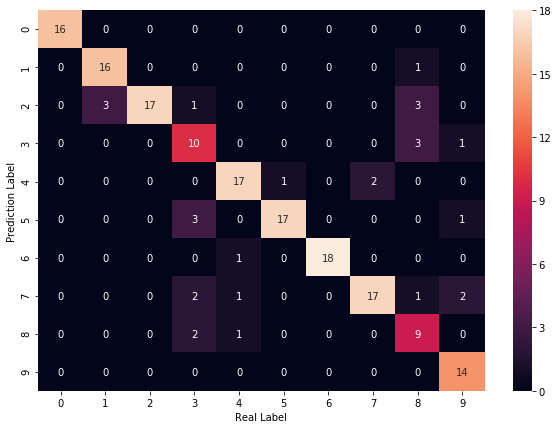

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:31 index:[5] real:5
#1 min_error:21 index:[2] real:2
#2 min_error:30 index:[8] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:22 index:[1] real:1
#5 min_error:21 index:[7] real:7
#6 min_error:8 index:[6] real:6
#7 min_error:19 index:[3] real:3
#8 min_error:5 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:32 index:[4] real:7
#11 min_error:30 index:[7] real:4
#12 min_error:16 index:[6] real:6
#13 min_error:22 index:[3] real:3
#14 min_error:24 index:[1] real:1
#15 min_error:23 index:[3] real:3
#16 min_error:31 index:[7] real:9
#17 min_error:23 index:[1] real:1
#18 min_error:28 index:[7] real:7
#19 min_error:7 index:[6] real:6
#20 min_error:29 index:[1] real:8
#21 min_error:18 index:[4] real:4
#22 min_error:15 index:[3] real:3
#23 min_error:32 index:[1 2] real:1
#24 min_error:12 index:[4] real:4
#25 min_error:7 index:[0] real:0
#26 min_error:15 index:[5] real:5
#27 min_error:14 index:[3] real:3
#28 min_error:15 index:[6] real:6
#29 min_error:21 index:[9] 

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8973407544836116
Avg Base Learner:0.8183364254792825


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2044 Total connections::2365


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.85